In [1]:
import sys
sys.path.append('/home/kal/K27act_models/convolution_model/')
sys.path.append('/home/kal/K27act_models/cg_model/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ucscgenome
import pyliftover
from tqdm import tqdm

#load in the DNA
genome19 = ucscgenome.Genome('/home/kal/.ucscgenome/hg19.2bit')
genome38 = ucscgenome.Genome('/home/kal/.ucscgenome/hg38.2bit')
lo = pyliftover.LiftOver('/home/kal/K27act_models/eqtl_data/hg38ToHg19.over.chain')

In [2]:
# import the ibd varients
ibd_l = pd.read_table('/home/kal/K27act_models/eqtl_data/IBD_list_of_varients.csv')
print(len(ibd_l))
ibd_l.head()

4312


,HD,chr,region (mb),signal,credible_nSNP,tier2,trait,trait.reassigned,variant,OR_CD,...,refAllele,altAllele,AF_1KG,info,P_mean_95,Func.refGene,Gene.refGene,Coding,TFBS,epigenetic
0,1,chr1,2.36-2.84,1,71,No,UC,UC,rs2495365,1.0,...,A,G,0.484,0.997,0.0472,ncRNA_exonic,LOC100996583,False,False,False
1,1,chr1,2.36-2.84,1,71,No,UC,UC,rs143280171,1.0,...,G,A,0.483,0.998,0.0426,ncRNA_intronic,LOC100996583,False,False,False
2,1,chr1,2.36-2.84,1,71,No,UC,UC,rs7515633,1.0,...,A,G,0.484,0.996,0.0407,UTR3,TNFRSF14,False,False,Gut_H3K27ac
3,1,chr1,2.36-2.84,1,71,No,UC,UC,rs2147905,1.0,...,T,C,0.490,1.000,0.0405,ncRNA_exonic,LOC115110,False,False,False
4,1,chr1,2.36-2.84,1,71,No,UC,UC,rs10910089,1.0,...,G,T,0.484,0.998,0.0366,ncRNA_intronic,LOC100996583,False,False,False


In [3]:
# check if reference matches genome
count=0
for idx, row in ibd_l.iterrows():
    if genome[row.chr][row.position].lower() != row.refAllele[0].lower():
        print('Should be {}'.format(genome[row.chr][row.position].lower()))
        print('Actually is {}'.format(row.refAllele.lower()))
        print('Alternate is {}'.format(row.altAllele.lower()))
        count+=1
        
print(count)

Should be c
Actually is a
Alternate is g
Should be c
Actually is a
Alternate is g
Should be t
Actually is a
Alternate is c
Should be t
Actually is a
Alternate is c
Should be t
Actually is a
Alternate is t
Should be t
Actually is d
Alternate is i
Should be g
Actually is d
Alternate is i
Should be g
Actually is a
Alternate is g
Should be a
Actually is d
Alternate is i
Should be t
Actually is d
Alternate is i
Should be t
Actually is a
Alternate is t
Should be g
Actually is a
Alternate is g
Should be t
Actually is i
Alternate is d
Should be t
Actually is i
Alternate is d
Should be c
Actually is i
Alternate is d
Should be a
Actually is d
Alternate is i
Should be t
Actually is a
Alternate is t
Should be t
Actually is d
Alternate is i
Should be t
Actually is d
Alternate is i
Should be t
Actually is i
Alternate is d
Should be g
Actually is i
Alternate is d
Should be g
Actually is d
Alternate is i
Should be t
Actually is a
Alternate is g
Should be c
Actually is a
Alternate is g
Should be a
Actu

In [4]:
ibd_l.to_csv('/home/kal/K27act_models/eqtl_data/IBD_list_of_varients.csv', sep='\t', index=False)

In [5]:
# import the other ibd varients
ibd_c = pd.read_table('/home/kal/K27act_models/eqtl_data/IBD_credible_sets_raw.csv')
ibd_c.chr = ['chr' + str(n) for n in ibd_c['chr']]
ibd_c = ibd_c.rename(index=str, columns={'A0':'refAllele', 'A1': 'altAllele', 'position.lead':'position'})
ibd_c.position = ibd_c.position - 1
ibd_c = ibd_c.fillna(False)
print(len(ibd_c))
ibd_c.head()

139


,HD,chr,signal,tier2,region_start,region_end,region_len,credible_start,credible_end,credible_len,...,AF_1KG,AF_HC,AF_CD,AF_UC,INFO.best,variant.lead,position,refAllele,altAllele,all.variant
0,1,chr1,1,No,"2,356,887","2,835,671","478,784","2,472,081","2,563,250","91,169",...,0.484,0.491,0.487,0.472,1.0,rs2495365,2498026,A,G,"rs2495365,rs143280171,rs7515633,rs2147905,rs10..."
1,2,chr1,1,No,"7,688,180","8,256,130","567,950","8,021,740","8,185,902","164,162",...,0.162,0.176,0.150,0.147,1.0,rs36016881,8051240,A,G,"rs36016881,rs67717282,rs60094536,chr1:8059336,..."
2,4,chr1,1,No,"20,098,249","20,303,899","205,650","20,165,971","20,171,860","5,889",...,0.555,0.538,0.554,0.606,1.0,rs6426833,20171859,G,A,"rs6426833,rs7523442"
3,4,chr1,2,No,False,False,False,"20,142,270","20,143,706","1,436",...,0.362,0.379,0.360,0.330,1.0,rs3806308,20142865,C,T,"rs3806308,rs10917548,rs10917547,rs3806306,rs12..."
4,4,chr1,3,No,False,False,False,"20,135,822","20,137,714","1,892",...,0.763,0.773,0.770,0.744,1.0,rs4655215,20137713,T,C,"rs4655215,rs10799838"


In [6]:
# check if reference matches genome
count=0
for idx, row in ibd_c.iterrows():
    if genome[row.chr][row.position].lower() != row.refAllele[0].lower():
        print('Should be {}'.format(genome[row.chr][row.position].lower()))
        print('Actually is {}'.format(row.refAllele.lower()))
        print('Alternate is {}'.format(row.altAllele.lower()))
        count+=1
        
print(count)

Should be t
Actually is i
Alternate is d
Should be a
Actually is d
Alternate is i
Should be c
Actually is i
Alternate is d
3


In [7]:
ibd_c.to_csv('/home/kal/K27act_models/eqtl_data/IBD_credible_sets.csv', sep='\t', index=False)

In [8]:
# import the eqtl data
eqtl = pd.read_table('/home/kal/K27act_models/eqtl_data/Cells_EBV-transformed_lymphocytes.hg19.txt')
eqtl = eqtl.rename(index=str, columns={'eqtl.ref.allele':'refAllele', 'eqtl.alt.allele': 'altAllele'})
eqtl.position = eqtl.position - 1
eqtl['position38'] = [int(e.split('_')[1]) - 1 for e in eqtl['variant_id']]
eqtl['chr38'] = [e.split('_')[0] for e in eqtl['variant_id']]
eqtl.head()

,chr,position,variant_id,gene_id,variant,prob.in.set,PosteriorProb,gene_name,CredibleSetSize,CredibleSet,...,ma_count,maf,pval_nominal,slope,slope_se,refAllele,altAllele,eqtl_name,position38,chr38
0,chr10,102087037,chr10_100327281_T_C_b38,ENSG00000224934.2,102087038,0.019453,0.023665,RP11-441O15.3,27.0,ENSG00000224934.2,...,36,0.122449,0.000652,0.375461,0.107300,T,C,chr10:102087038:RP11-441O15.3,100327280,chr10
1,chr10,102087112,chr10_100327356_G_T_b38,ENSG00000224934.2,102087113,0.005739,0.006981,RP11-441O15.3,NaN,NaN,...,58,0.197279,0.001981,-0.268628,0.084970,G,T,chr10:102087113:RP11-441O15.3,100327355,chr10
2,chr10,102103036,chr10_100343280_C_T_b38,ENSG00000119929.12,102103037,0.051836,0.047800,CUTC,43.0,ENSG00000119929.12,...,33,0.112245,0.000046,0.452428,0.107065,C,T,chr10:102103037:CUTC,100343279,chr10
3,chr10,102105629,chr10_100345873_T_C_b38,ENSG00000119929.12,102105630,0.441053,0.406717,CUTC,43.0,ENSG00000119929.12,...,32,0.108844,0.000003,0.502150,0.102816,T,C,chr10:102105630:CUTC,100345872,chr10
4,chr10,102127491,chr10_100367735_A_G_b38,ENSG00000119929.12,102127492,0.043167,0.039806,CUTC,43.0,ENSG00000119929.12,...,40,0.136054,0.000060,-0.380238,0.091461,A,G,chr10:102127492:CUTC,100367734,chr10


In [9]:
# check if reference matches genome
count=0
for idx, row in tqdm(eqtl.iterrows(), total=len(eqtl)):
    if genome38[row.chr38][row.position38].lower() != row.refAllele[0].lower():
        print('Should be {}'.format(genome[row.chr38][row.position38].lower()))
        print('Actually is {}'.format(row.refAllele.lower()))
        print('Alternate is {}'.format(row.altAllele.lower()))
        count+=1
        
print(count)

100%|██████████| 239048/239048 [00:23<00:00, 9972.38it/s] 

0


In [43]:
# map from hg38 to hg19
good_scores = list()
bad_scores=list()
verb=False
# pyliftover produces tuples (target_chromosome, target_position, target_strand, conversion_chain_score),
for index, row in tqdm(eqtl.iterrows(), total=len(eqtl)):
    new_cords = lo.convert_coordinate(row.chr38, row.position38)
    if len(new_cords) > 1 and verb:
        print(new_cords)
    eqtl.at[idx, 'chr19'] = new_cords[0][0]
    eqtl.at[idx, 'position19'] = new_cords[0][1]
    if row.refAllele.lower()[0] != genome[new_cords[0][0]][new_cords[0][1]].lower():
        if verb:
            print('old' + str([row.chr38, row.position38]))
            print('new' + str(new_cords))
            print('38 is {}, reference is {}, 19 is {}'.format(genome38[row.chr38][row.position38].lower(), 
                                                        row.refAllele.lower(), 
                                                       genome[new_cords[0][0]][new_cords[0][1]].lower()))
        bad_scores.append(new_cords[0][3])
    else:
        good_scores.append(new_cords[0][3])



  0%|          | 0/239048 [00:00<?, ?it/s]

  0%|          | 1/239048 [00:00<11:17:16,  5.88it/s]

  0%|          | 782/239048 [00:00<7:52:42,  8.40it/s]

  1%|          | 1588/239048 [00:00<5:29:55, 12.00it/s]

  1%|          | 2368/239048 [00:00<3:50:20, 17.13it/s]

  1%|▏         | 3153/239048 [00:00<2:40:51, 24.44it/s]

  2%|▏         | 3946/239048 [00:00<1:52:21, 34.87it/s]

  2%|▏         | 4747/239048 [00:00<1:18:32, 49.72it/s]

  2%|▏         | 5526/239048 [00:00<54:56, 70.84it/s]  

  3%|▎         | 6322/239048 [00:00<38:28, 100.81it/s]

  3%|▎         | 7123/239048 [00:01<26:59, 143.25it/s]

  3%|▎         | 7916/239048 [00:01<18:58, 203.07it/s]

  4%|▎         | 8687/239048 [00:01<13:23, 286.84it/s]

  4%|▍         | 9473/239048 [00:01<09:29, 403.45it/s]

  4%|▍         | 10264/239048 [00:01<06:45, 564.02it/s]

  5%|▍         | 11043/239048 [00:01<04:51, 781.40it/s]

  5%|▍         | 11823/239048 [00:01<03:32, 1070.33it/s]

  5%|▌         | 12602/239048 [00:01<02:37, 1441.

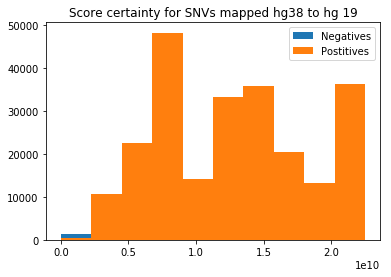

3362


In [65]:
plt.hist(bad_scores, label='Negatives', bins=10)  
plt.hist(good_scores, label='Postitives', bins=10) 
plt.legend()
plt.title('Score certainty for SNVs mapped hg38 to hg 19')
plt.show()

print(len(bad_scores))

In [73]:
# write out hg 38 eqtl data
eqtl38['position'] = eqtl['position38']
eqtl38['chr'] = eqtl['chr38']
columns = ['chr', 'position', 'variant_id', 'refAllele', 'altAllele', 'gene_id', 'variant', 'prob.in.set',
           'PosteriorProb', 'gene_name', 'CredibleSetSize', 'CredibleSet', 'CredibleSetName', 'median.expression', 
           'missingness', 'mappability.k50', 'tss_distance', 'ma_samples', 'ma_count', 'maf', 'pval_nominal', 
           'slope', 'slope_se', 'eqtl_name']
eqtl38.to_csv('/home/kal/K27act_models/eqtl_data/Cells_EBV-transformed_lymphocytes.hg38.csv', index=None, sep='\t', columns=columns)

In [74]:
eqtlin = pd.read_table('/home/kal/K27act_models/eqtl_data/Cells_EBV-transformed_lymphocytes.hg38.csv')
eqtlin.head()

,chr,chr.1,position,position.1,variant_id,refAllele,altAllele,gene_id,variant,prob.in.set,...,missingness,mappability.k50,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,eqtl_name
0,chr10,chr10,100327280,100327280,chr10_100327281_T_C_b38,T,C,ENSG00000224934.2,102087038,0.019453,...,0.000000,1.0,896090,33,36,0.122449,0.000652,0.375461,0.107300,chr10:102087038:RP11-441O15.3
1,chr10,chr10,100327355,100327355,chr10_100327356_G_T_b38,G,T,ENSG00000224934.2,102087113,0.005739,...,0.000000,1.0,896165,52,58,0.197279,0.001981,-0.268628,0.084970,chr10:102087113:RP11-441O15.3
2,chr10,chr10,100343279,100343279,chr10_100343280_C_T_b38,C,T,ENSG00000119929.12,102103037,0.051836,...,0.003580,1.0,620362,33,33,0.112245,0.000046,0.452428,0.107065,chr10:102103037:CUTC
3,chr10,chr10,100345872,100345872,chr10_100345873_T_C_b38,T,C,ENSG00000119929.12,102105630,0.441053,...,0.000000,1.0,622955,32,32,0.108844,0.000003,0.502150,0.102816,chr10:102105630:CUTC
4,chr10,chr10,100367734,100367734,chr10_100367735_A_G_b38,A,G,ENSG00000119929.12,102127492,0.043166,...,0.004773,1.0,644817,38,40,0.136054,0.000060,-0.380238,0.091461,chr10:102127492:CUTC
